## この問題は需要予測，株価予測などの時系列予測とかをやりたい人は勉強しておくと後々楽
興味ある人は調べるか聞くかして

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.metrics import mean_squared_error as MSE
from tqdm import tqdm #使えると便利　プログレスバーの表示

### 学習データ

In [2]:
X=[0.1, 0.3, 0.5, 0.7, 0.9] #入力データ配列
d=[0.3381, 0.6658, 0.8627, 1.2297, 1.6574] #望ましい出力データ配列　(正解データ，教師データともいう)

In [12]:
X=[0.20, 0.30, 0.40, 0.50] #入力データ配列  20歳，３０際，４０歳，５０歳　計算を楽にするため１/１００に
d=[0.371, 0.484, 0.573, 0.661] #望ましい出力データ配列　(正解データ，教師データともいう)　平均年収　

In [4]:
line=[d[0],d[-1]]
line_x=[X[0],X[-1]]

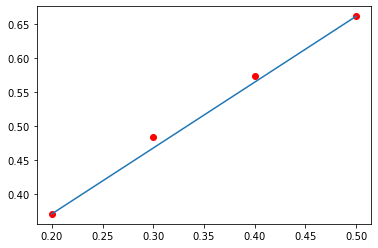

In [13]:
plt.scatter(X,d,color='r')
#plt.plot(X,d)
plt.plot(line_x,line)

### ニューロンの内部状態方程式

In [14]:
def Neuron(w,x,b): #重み，入力，バイアスを受け取りYを出力する関数
    Y=w*x+b
     return Y

### 重み更新

In [15]:
def Weight(w,d,y,x,lr): #重み，正解データ，出力，入力を受け取り重み更新
    W_next=w+lr*(d-y)*x
    return W_next

### バイアス更新

In [16]:
def Bias(b,d,y,x,lr): #重み，正解データ，出力，入力を受け取りバイアス更新
    b_next=b+lr*(d-y)*1
    return b_next

### 計算

In [40]:
w = random.uniform(-0.001,0.001)#(絶対値0.001以下のfloat) 
b = random.uniform(-0.001,0.001)
lr=0.01 #表記されているもの　learning ratetと呼ばれていてどのくらい学習するのか決める　0.001～１の範囲で変更してみること
K_num=100 #学習回数
target_RMSE=0.015 # RMSE MSE等の計算方法は後々使うので軽く調べておくと後々楽　(損失関数)
Error = []

for k in tqdm(range(K_num)):
    List_y=[]
    for i in range(len(X)):
        y = Neuron(w,X[i],b)
        List_y.append(y)
        w = Weight(w,d[i],y,X[i],lr)
        b = Bias(b,d[i],y,X[i],lr)
    w_list.append(w)
    b_list.append(b)
    RMSE=np.sqrt(MSE(d,List_y))
    Error.append(RMSE)
    if RMSE<=target_RMSE: 
        print('学習完了')
        print(k,'epoch')
        print('RMSE',RMSE)
        break
        
if k+1==K_num:
    print('学習回数上限')
    print('RMSE',RMSE)

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 7162.77it/s]

学習回数上限
RMSE 0.08591459647333509


### 結果確認 
ここのプログラムはまだ勉強しなくて大丈夫

In [29]:
df_predected=  pd.DataFrame(List_y)
df_Answer=pd.DataFrame(d)
df_result=pd.concat([df_predected,df_Answer],axis=1)
df_result.columns=['出力','望ましい出力']
df_result

,出力,望ましい出力
0,0.410708,0.371
1,0.485393,0.484
2,0.560476,0.573
3,0.635724,0.661


### 学習曲線

In [28]:
pip install japanize-matplotlib
#pltのグラフタイトル等に日本語を表示できるようにする機能追加
#一回実行すればダウンロードされるから二回目からはやらなくてOK

SyntaxError: invalid syntax (<ipython-input-28-accd4397f239>, line 1)

In [30]:
import japanize_matplotlib

Text(0.5, 1.0, '学習曲線')

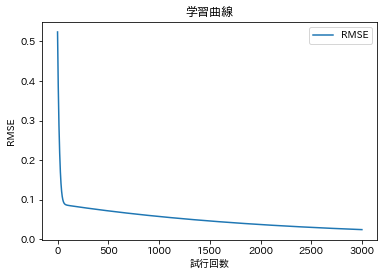

In [37]:
plt.plot(Error,label='RMSE')
plt.legend()
plt.xlabel('試行回数')
plt.ylabel('RMSE')
plt.title('学習曲線')